<a href="https://colab.research.google.com/github/oneryigit/notebooks/blob/main/kurdish_conflict_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kim_city_level.csv")
df.head()

,Unnamed: 0,province,borderpv,deathspv,frequencyclash,intensityclash,murders,rebellion,plaka_no
0,0,ADIYAMAN,0,495.0,2.0,4.0,0.0,1,2
1,1,AGRI,1,912.0,27.0,41.0,0.0,1,4
2,2,ARDAHAN,1,132.0,2.0,2.0,0.0,0,75
3,3,BATMAN,0,1260.0,40.0,100.0,182.0,1,72
4,4,BINGOL,0,3888.0,102.0,303.0,2.0,1,12


In [3]:
tr_geo= gpd.read_file("/content/drive/MyDrive/shapefiles/turkey shape/tur_polbnda_adm1.shp")

tr_geo

,adm1_tr,adm1_en,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry
0,ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367..."
1,ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"POLYGON ((39.25297 38.18188, 39.25334 38.18159..."
2,AFYONKARAHİSAR,AFYONKARAHISAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"POLYGON ((31.14797 39.26246, 31.15825 39.25753..."
3,AĞRI,AGRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.28706 40.01281, 43.29129 40.00884..."
4,AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"POLYGON ((33.96446 39.03804, 33.96453 39.03723..."
...,...,...,...,...,...,...,...,...,...
76,UŞAK,USAK,TUR064,3.864988,0.574221,TURKEY,TÜRKİYE,TUR,"POLYGON ((29.74957 38.92497, 29.75259 38.92385..."
77,VAN,VAN,TUR065,8.362708,2.159743,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.86293 39.35519, 43.86625 39.35450..."
78,YALOVA,YALOVA,TUR077,2.051652,0.087016,TURKEY,TÜRKİYE,TUR,"POLYGON ((29.53290 40.74757, 29.53292 40.73702..."
79,YOZGAT,YOZGAT,TUR066,6.386410,1.436743,TURKEY,TÜRKİYE,TUR,"POLYGON ((35.38648 40.24666, 35.38896 40.24665..."


In [4]:
merged=tr_geo.merge(df, how="left", right_on='province', left_on='adm1_en')

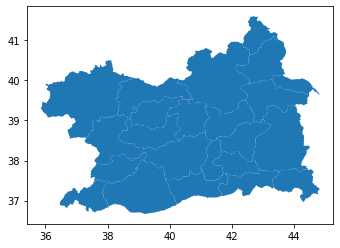

In [5]:
merged2= tr_geo.merge(df, how="right", right_on='province', left_on='adm1_en')
merged2.plot()

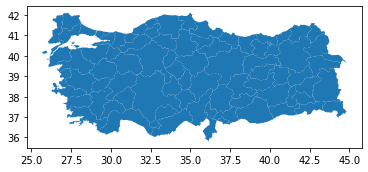

In [6]:
merged.plot()

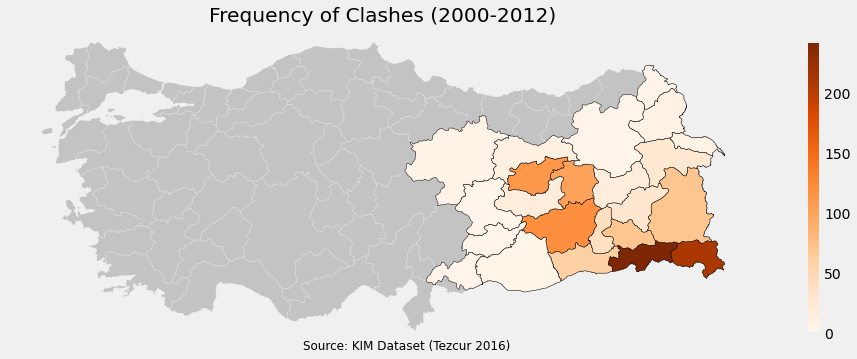

In [7]:
plt.rcParams.update({'font.size': 16}) #to set font size for all properties of plot
plt.style.use('fivethirtyeight') #choose a theme from the list above. 

fig, ax= plt.subplots(figsize=(15,10))

merged.plot(ax=ax,color='gray', edgecolor='w',alpha=0.4) #TR
# kurds_geo.plot(ax=ax, color='firebrick', edgecolor='y') #Kurds
# capitals.plot(ax=ax, color='k')
merged2.plot(ax=ax, column=merged2['frequencyclash'], cmap='Oranges', edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})

ax.set_title('Frequency of Clashes (2000-2012)')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# for x, y, label in zip(capitals.geometry.x, capitals.geometry.y, capitals.Country):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

txt="Source: KIM Dataset (Tezcur 2016)"
plt.figtext(0.45, 0.25, txt, wrap=True, horizontalalignment='center', fontsize=12);

fig.savefig('Kurds_freq_clash.pdf')

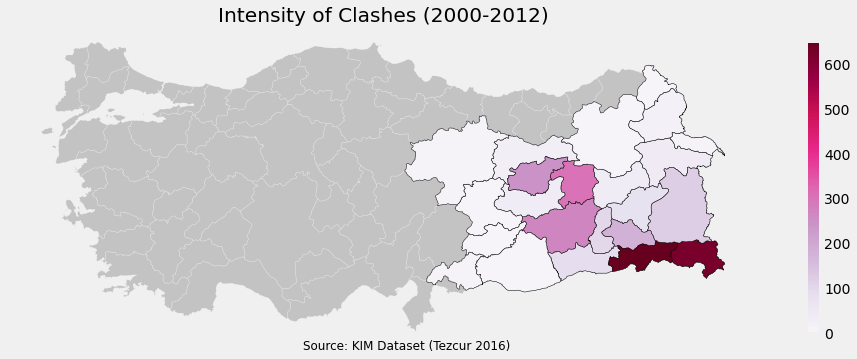

In [8]:
plt.style.use('fivethirtyeight')

fig, ax= plt.subplots(figsize=(15,10))

merged.plot(ax=ax,color='gray', edgecolor='w',alpha=0.4) #TR
# kurds_geo.plot(ax=ax, color='firebrick', edgecolor='y') #Kurds
# capitals.plot(ax=ax, color='k')
merged2.plot(ax=ax, column=merged2['intensityclash'], cmap='PuRd', edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})

ax.set_title('Intensity of Clashes (2000-2012)')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])


# for x, y, label in zip(capitals.geometry.x, capitals.geometry.y, capitals.Country):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

txt="Source: KIM Dataset (Tezcur 2016)"
plt.figtext(0.45, 0.25, txt, wrap=True, horizontalalignment='center', fontsize=12);

fig.savefig('Kurds_intensity.pdf')

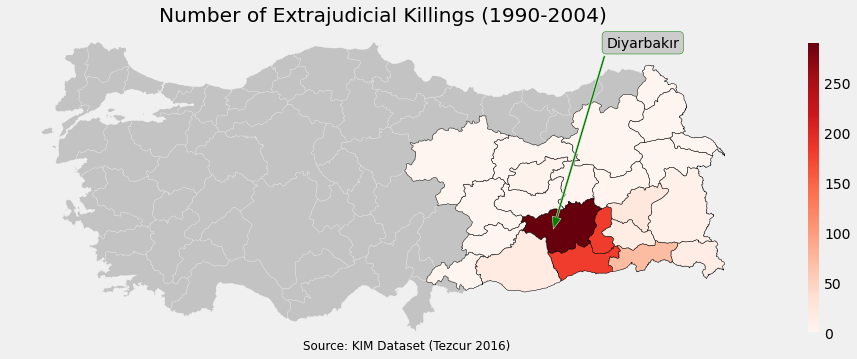

In [9]:
plt.style.use('fivethirtyeight')

fig, ax= plt.subplots(figsize=(15,10))

merged.plot(ax=ax,color='gray', edgecolor='w',alpha=0.4) #TR
# kurds_geo.plot(ax=ax, color='firebrick', edgecolor='y') #Kurds
# capitals.plot(ax=ax, color='k')
merged2.plot(ax=ax, column=merged2['murders'], cmap='Reds', edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})

bbox = dict(boxstyle="round", fc="0.8",color='green')
ax.grid(False)

ax.set_title('Number of Extrajudicial Killings (1990-2004)')
ax.annotate(s="Diyarbakır",xy=(40,38), xytext=(41.5, 42), bbox=bbox, arrowprops=dict(facecolor ='green', shrink = 0.01, width=2,headwidth=9))
ax.set_xticks([])
ax.set_yticks([])


# for x, y, label in zip(capitals.geometry.x, capitals.geometry.y, capitals.Country):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

txt="Source: KIM Dataset (Tezcur 2016)"
plt.figtext(0.45, 0.25, txt, wrap=True, horizontalalignment='center', fontsize=12);

fig.savefig('Kurds_murder.pdf')